In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks
import os
import shutil
import gpt
import claude
from PIL import Image
import cv2


[B-L1-W1] D o c u d d r a  65%
[B-L1-W2] d o p p e r  70%
[B-L1-W3] t h i s  85%
[B-L1-W4] i s  90%
[B-L1-W5] m y  85%
[B-L1-W6] h a n d w r i t i n g  80%

Note: The first two words are particularly difficult to decipher with certainty, hence the lower confidence scores. The rest of the phrase is more legible in cursive handwriting.


In [2]:
# Read image
IMAGE_PATH = "./davidNotes.jpg"

image = Image.open(IMAGE_PATH).convert('RGB')

# Convert PIL Image to OpenCV format (numpy array)
img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise before thresholding
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Instead of adaptive threshold, use regular threshold with OTSU
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply slight median blur to remove remaining speckles
denoised = cv2.medianBlur(thresh, 3)

# Optional: If still too spotty, uncomment this line to apply additional smoothing
# denoised = cv2.GaussianBlur(denoised, (3, 3), 0)

# Convert back to 3-channel (but still grayscale)
denoised_3channel = cv2.cvtColor(denoised, cv2.COLOR_GRAY2BGR)
denoised_rgb = cv2.cvtColor(denoised_3channel, cv2.COLOR_BGR2RGB)

# Convert to PIL Image and then to numpy array
processed_pil = Image.fromarray(denoised_rgb)
img_arr = np.array(processed_pil, dtype=np.uint32)
original_img_arr = np.array(processed_pil, dtype=np.uint8)

# processed_pil.show()

Make each row the avg color in black and white

In [3]:
for row in img_arr:
    R = 0
    G = 0
    B = 0
    for pixel in row:
        R = R + pixel[0]
        G = G + pixel[1]
        B = B + pixel[2]
    
    #Set every pixel to its average r g and b value
    avg_R = R/len(row)
    avg_G = G/len(row)
    avg_B = B/len(row)
    
    avg = (avg_R+avg_B+avg_G)/3
    
    for pixel in row:
        pixel[0] = avg
        pixel[1] = avg
        pixel[2] = avg

Convert back to image

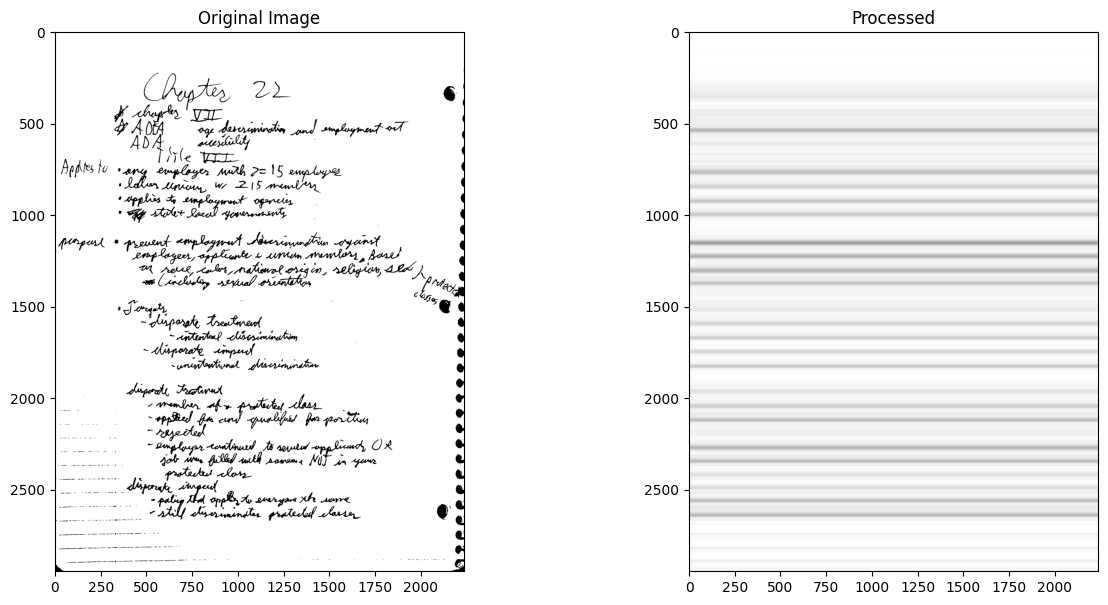

In [4]:
# Convert the processed array back to uint8 for pillow compatibility
formatted_img_arr = np.clip(img_arr, 0, 255).astype(np.uint8)

result_img = Image.fromarray(formatted_img_arr)

plt.figure(figsize=(15, 7))  # Adjust figure size as needed

#Show Images
plt.subplot(1, 2, 1)  # (rows, columns, index)
plt.imshow(np.array(processed_pil))
#plt.axis('off')
plt.title("Original Image")

plt.subplot(1, 2, 2)  # (rows, columns, index)
plt.imshow(np.array(result_img))
#plt.axis('off')
plt.title("Processed")

plt.show()

Notice How you can see the line breaks. This might be useful when breaking up pages into chunks to feed into the AI

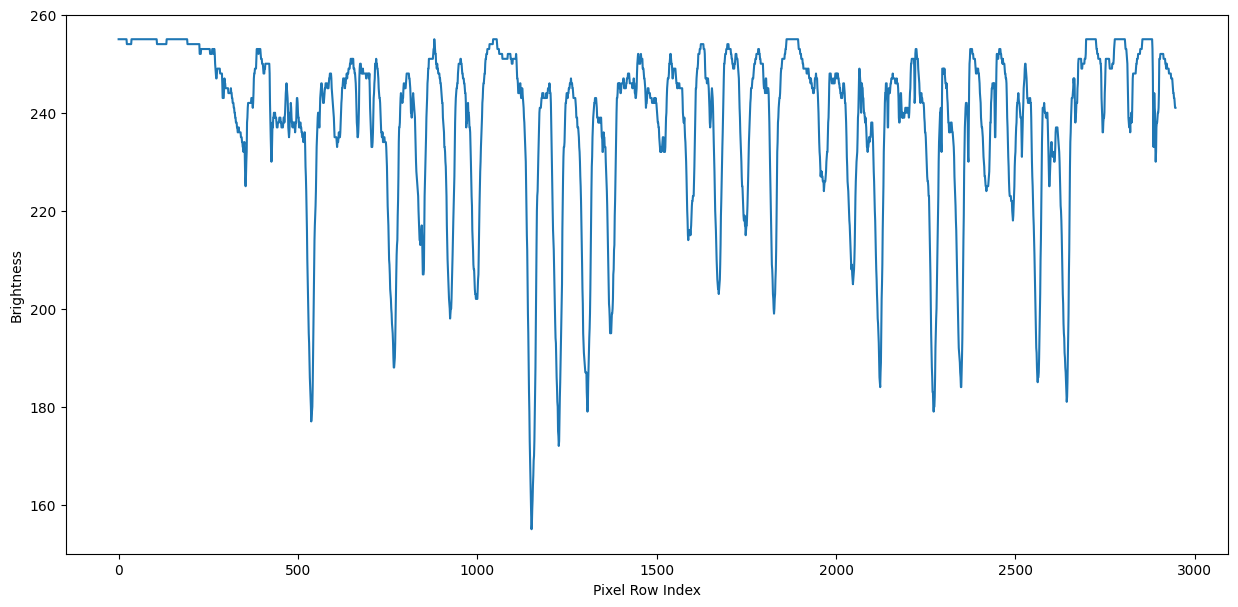

In [5]:
brightness = []

for row in img_arr:
    brightness.append(row[0][0])

plt.figure(figsize=(15, 7))
plt.plot(brightness)
plt.xlabel("Pixel Row Index")
plt.ylabel("Brightness")
plt.show()

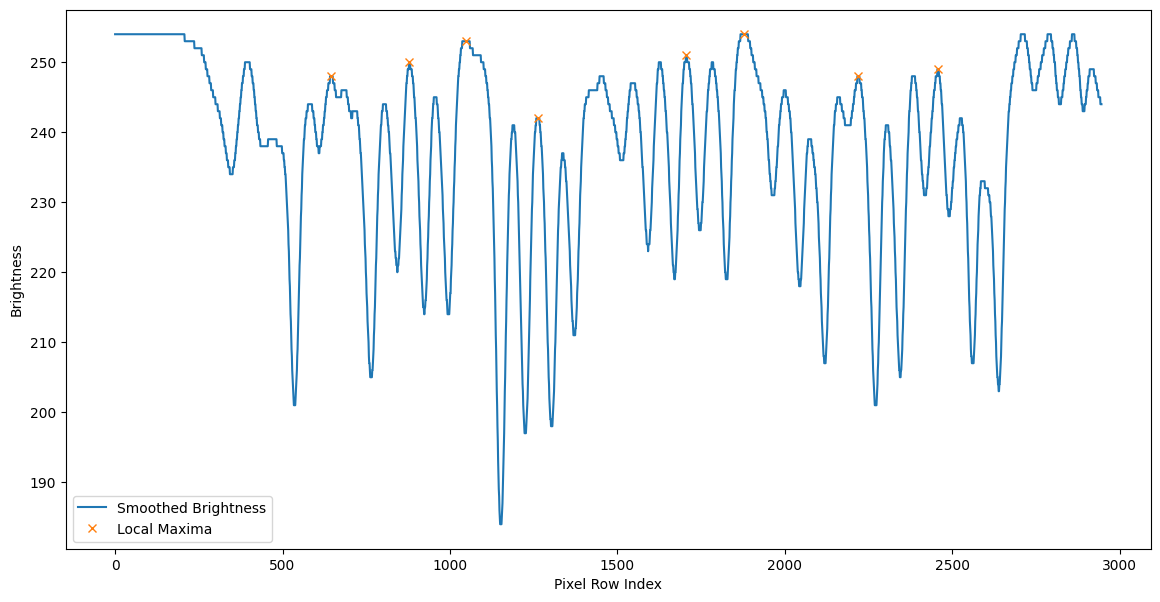

In [6]:
# Original data processing
brightness_np = np.array(brightness)
smoothed_data = gaussian_filter1d(brightness_np, sigma=10)

# More selective peak detection
peaks, _ = find_peaks(smoothed_data, 
    distance=100,          # Minimum distance between peaks
    height=None,         # Minimum height for peak to be considered
    prominence=32,       # Minimum prominence (height relative to neighboring valleys)
    width=None,         # Minimum width of peaks
    threshold=None,      # Minimum height difference with neighboring points
)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(smoothed_data, label="Smoothed Brightness")
plt.plot(peaks, smoothed_data[peaks], "x", label="Local Maxima")
plt.xlabel("Pixel Row Index")
plt.ylabel("Brightness")
plt.legend()
plt.show()

In [7]:
lined_img_arr = original_img_arr.copy()

for i, row in enumerate(img_arr):
    if i in peaks:
        for pixel in row:
            pixel[0] = 0
            pixel[1] = 0
            pixel[2] = 255

for i, row in enumerate(lined_img_arr):
    if i in peaks:
        for pixel in row:
            pixel[0] = 0
            pixel[1] = 0
            pixel[2] = 255
            

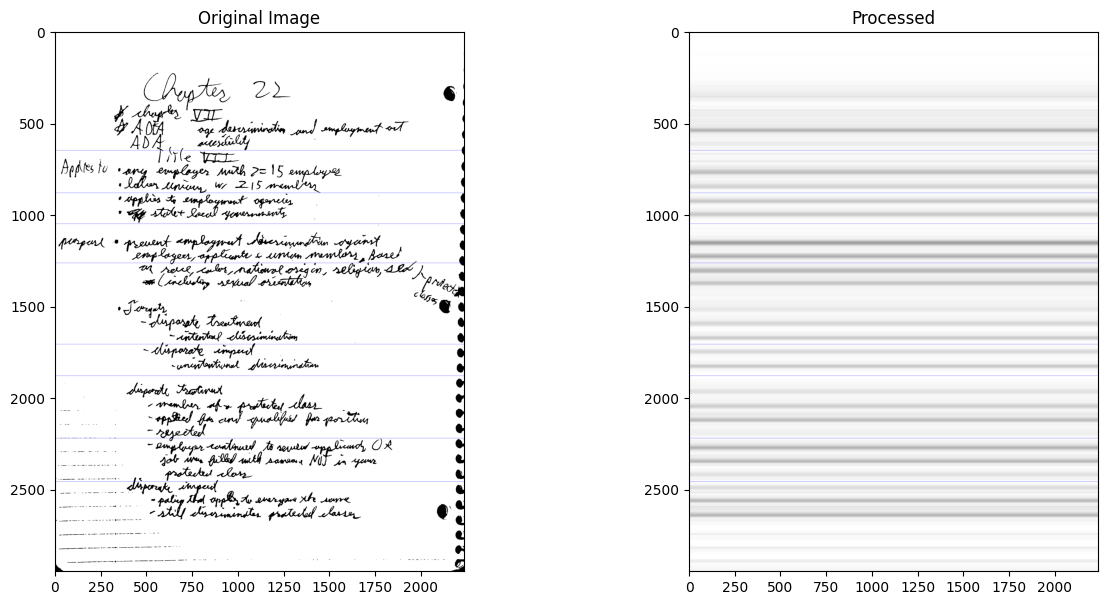

In [8]:
# Convert the processed array back to uint8 for pillow compatibility
formatted_img_arr = np.clip(img_arr, 0, 255).astype(np.uint8)

result_img = Image.fromarray(formatted_img_arr)
tweaked_img = Image.fromarray(lined_img_arr)

plt.figure(figsize=(15, 7))

#Show Images
plt.subplot(1, 2, 1)  # (rows, columns, index)
plt.imshow(np.array(tweaked_img))
#plt.axis('off')
plt.title("Original Image")

plt.subplot(1, 2, 2)  # (rows, columns, index)
plt.imshow(np.array(result_img))
#plt.axis('off')
plt.title("Processed")

plt.show()

In [9]:
split_images = []
mini_image = []

for i, row in enumerate(original_img_arr):
    mini_image.append(row)
    
    # If the image should be split on this row
    if i in peaks:
        split_images.append(np.array(mini_image))  # Convert mini_image to a numpy array before appending
        mini_image = []  # Reset the mini image
#Make sure to add the last one
split_images.append(np.array(mini_image))

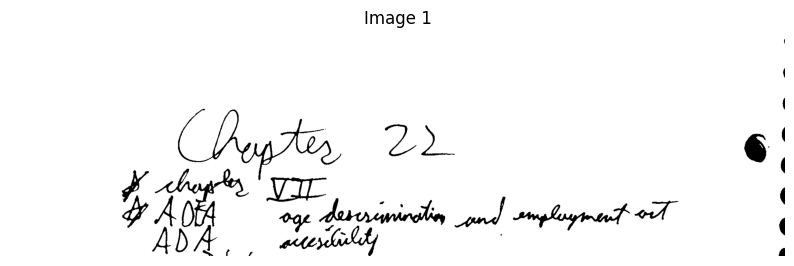

```plaintext
[T1-L1-W1] C h a p t e r  88%
[T1-L1-W2] 2 2  90%
[B-L1-W1] §  85%
[B-L1-W2] c h a p t e r  80%
[B-L1-W3] V I I  92%
[B-L2-W1] §  85%
[B-L2-W2] A D A  90%
[B-L3-W1] A D A  90%
[B-L4-W1] a g e  82%
[B-L4-W2] d i s c r i m i n a t i o n  80%
[B-L4-W3] a n d  85%
[B-L4-W4] e m p l o y m e n t  83%
[B-L4-W5] a c t  88%
[B-L5-W1] a c c e s s i b i l i t y  84%
```


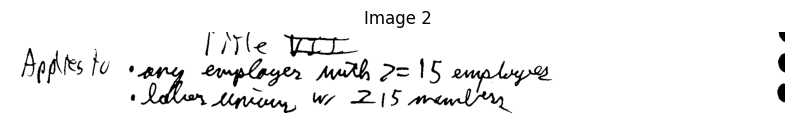

```plaintext
[T1-W1] T i t l e  85%
[T1-W2] V I I I  90%
[B-L1-W1] A p p l i e s  88%
[B-L1-W2] t o  95%
[B-L2-W1] a n y  92%
[B-L2-W2] e m p l o y e r  90%
[B-L2-W3] w i t h  93%
[B-L2-W4] 2 - 1 5  90%
[B-L2-W5] e m p l o y e e s  85%
[B-L3-W1] l a b o r  87%
[B-L3-W2] u n i o n  82%
[B-L3-W3] w /  80%
[B-L3-W4] 2 - 1 5  90%
[B-L3-W5] m e m b e r s  88%
```


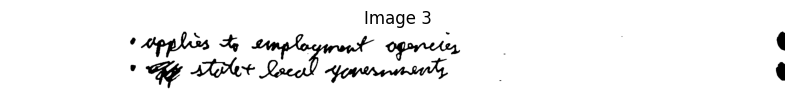

[B-L1-W1] a p p l i e s  90%  
[B-L1-W2] t o  92%  
[B-L1-W3] e m p l o y m e n t  88%  
[B-L1-W4] a g e n c i e s  85%  
[B-L1-W5] .  95%  
[B-L2-W1] a n d  80%  
[B-L2-W2] s t a t e  82%  
[B-L2-W3] +  95%  
[B-L2-W4] l o c a l  87%  
[B-L2-W5] g o v e r n m e n t s  83%  
[B-L2-W6] .  95%  


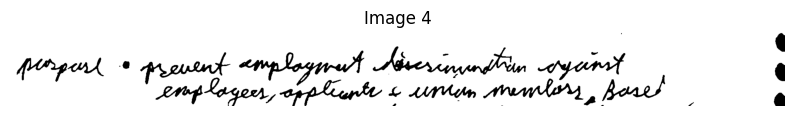

[B-L1-W1] P r o p e r  80%  
[B-L1-W2] ,  95%  
[B-L1-W3] p r e v e n t  85%  
[B-L1-W4] e m p l o y m e n t  80%  
[B-L1-W5] d i s c r i m i n a t i o n  70%  
[B-L1-W6] a g a i n s t  75%  
[B-L1-W7] e m p l o y e e s  80%  
[B-L1-W8] ,  95%  
[B-L1-W9] a p p l i c a n t s  78%  
[B-L1-W10] &  95%  
[B-L1-W11] u n i o n  75%  
[B-L1-W12] m e m b e r s  80%  
[B-L1-W13] ,  95%


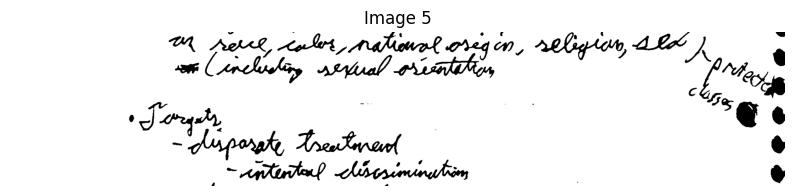

```
[B-L1-W1] r a c e  85%
[B-L1-W2] ,  95%
[B-L1-W3] c o l o r  88%
[B-L1-W4] ,  95%
[B-L1-W5] n a t i o n a l  87%
[B-L1-W6] o r i g i n  90%
[B-L1-W7] ,  95%
[B-L1-W8] r e l i g i o n  88%
[B-L1-W9] ,  95%
[B-L1-W10] s e x  90%
[B-L2-W1] (  95%
[B-L2-W2] i n c l u d i n g  82%
[B-L2-W3] s e x u a l - o r i e n t a t i o n  75%
[B-L2-W4] )  95%
[B-L3-W1] J o b s  88%
[B-L4-W1] -  95%
[B-L4-W2] d i s p a r a t e  80%
[B-L4-W3] t r e a t m e n t  85%
[B-L5-W1] -  95%
[B-L5-W2] i n t e n t i o n a l  78%
[B-L5-W3] d i s c r i m i n a t i o n  83%
```


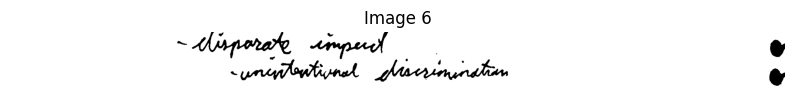

[B-L1-W1] d i s p a r a t e  85%  
[B-L1-W2] i m p a c t  87%  
[B-L2-W1] u n i n t e n t i o n a l  80%  
[B-L2-W2] d i s c r i m i n a t i o n  82%


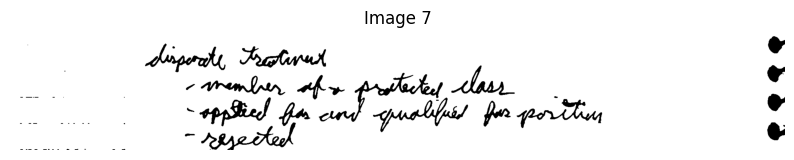

[B-L1-W1] d i s p a r a t e  85%  
[B-L1-W2] t r e a t m e n t  80%  
[B-L2-W1] m e m b e r  90%  
[B-L2-W2] o f  92%  
[B-L2-W3] a  93%  
[B-L2-W4] p r o t e s t e d  88%  
[B-L2-W5] c l a s s  87%  
[B-L3-W1] a p p l i e d  86%  
[B-L3-W2] f o r  94%  
[B-L3-W3] a n d  95%  
[B-L3-W4] q u a l i f i e d  80%  
[B-L3-W5] f o r  92%  
[B-L3-W6] p o s i t i o n  85%  
[B-L4-W1] r e j e c t e d  83%  


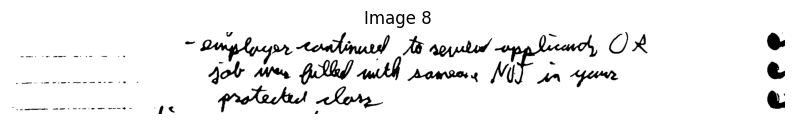

```plaintext
[B-L1-W1] e m p l o y e r  85%
[B-L1-W2] c o n t i n u e d  88%
[B-L1-W3] t o  90%
[B-L1-W4] r e v i e w  75%
[B-L1-W5] a p p l i c a n t s  80%
[B-L1-W6] o r  90%
[B-L1-W7] j o b  92%
[B-L1-W8] w a s  85%
[B-L1-W9] f i l l e d  88%
[B-L1-W10] w i t h  85%
[B-L1-W11] s o m e o n e  80%
[B-L1-W12] N O T  95%
[B-L1-W13] i n  92%
[B-L1-W14] y o u r  88%
[B-L1-W15] p r o t e c t e d  80%
[B-L1-W16] c l a s s  85%
```


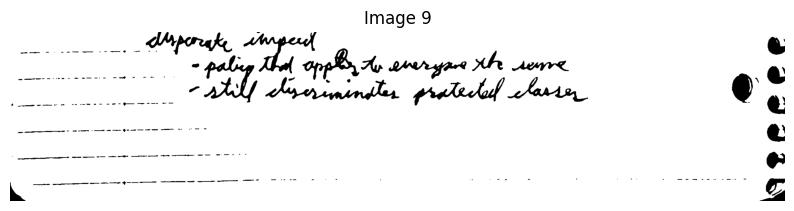

[B-L1-W1] d i s p a r a t e  85%  
[B-L1-W2] i m p a c t  87%  
[B-L2-W1] p o l i c y  90%  
[B-L2-W2] t h a t  88%  
[B-L2-W3] a p p l i e s  82%  
[B-L2-W4] t o  92%  
[B-L2-W5] e v e r y o n e  85%  
[B-L2-W6] t h e  90%  
[B-L2-W7] s a m e  88%  
[B-L3-W1] s t i l l  90%  
[B-L3-W2] d i s c r i m i n a t e s  80%  
[B-L3-W3] p r o t e c t e d  85%  
[B-L3-W4] c l a s s e s  83%  


In [10]:
# Directory to save the split images
output_dir = "split_images"

# Clear the directory if it exists
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)  # Remove the directory and all its contents
os.makedirs(output_dir, exist_ok=True)  # Recreate the empty directory

# Convert split images to PIL images and save them
for i, pic in enumerate(split_images):
    # Convert to PIL Image
    converted_img = Image.fromarray(pic)
    
    # Save the image
    image_path = os.path.join(output_dir, f"image_{i+1}.png")
    converted_img.save(image_path)
    
    # Display each image
    plt.figure(figsize=(10, 10))
    plt.imshow(pic)
    plt.axis('off')
    plt.title(f"Image {i+1}")
    plt.show()
    
    gpt.run_chatgpt(image_path)
    
plt.show()